# Homework 5 Code

In [ ]:
# Add import statements here
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import sklearn
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
import numpy as  np
from sklearn.ensemble import RandomForestClassifier
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

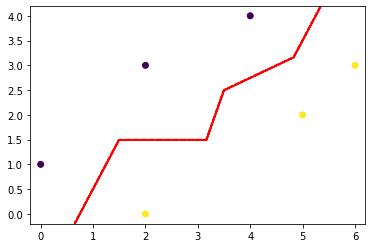

In [ ]:
#a)
X = np.array([(2,0),(5,2),(6,3),(0,1),(2,3),(4,4)])
Y = np.array([[1],[1],[1],[-1],[-1],[-1]])

plt.scatter(X[:,0],X[:,1],c=Y)
knn = KNeighborsClassifier(n_neighbors = 1)
h = .01
x1_min,x1_max = X[:,0].min()-.2,X[:,0].max()+.2
x2_min,x2_max = X[:,1].min()-.2,X[:,1].max()+.2
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,h),np.arange(x2_min,x2_max,h))
knn.fit(X,Y.reshape((6)))
Z = knn.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contour(xx1,xx2,Z,colors = 'red')
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
plt.show()

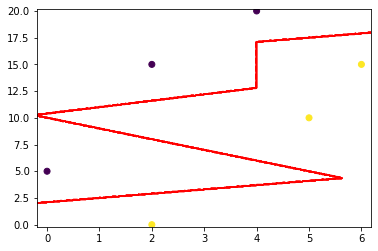

In [ ]:
#b)
X = np.array([(2,0),(5,10),(6,15),(0,5),(2,15),(4,20)])
Y = np.array([[1],[1],[1],[-1],[-1],[-1]])

plt.scatter(X[:,0],X[:,1],c=Y)
knn = KNeighborsClassifier(n_neighbors = 1)
h = .01
i = .05
x1_min,x1_max = X[:,0].min()-.2,X[:,0].max()+.2
x2_min,x2_max = X[:,1].min()-.2,X[:,1].max()+.2
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,h),np.arange(x2_min,x2_max,i))
knn.fit(X,Y.reshape((6)))
Z = knn.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contour(xx1,xx2,Z,colors = 'red')
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
plt.show()

c)
Scaling the feature of x2 caused the decision boundary to be affected by x2 values significantly more than in part a). This occurs because if we are using the same size scale for x1 and x2, the x2 values in part b) that are large now have much more influence in deciding the label of the test data points compared to before. The calculation of Euclidean distance for features tells us this. The scaled feature dominates the Euclidean distance formula in creating the decision boundary.

There are 60,000 training examples and 10,000 test examples.
The image size is 28x28.



## Neural Network

The `neural_network` function creates a model that learns to classify handwritten digits.

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels

Outputs: 
* `test_loss` is the loss after evaluating the testing dataset
* `test_acc` is the accuracy after evaluating the testing dataset
* `predictions` are the models predictions of the testing dataset

Note: Have fun and be creative with this assignment!


## Run and Plot

Run your neural network code and plot figures below

11493376/11490434 [==============================] - 0s 0us/step


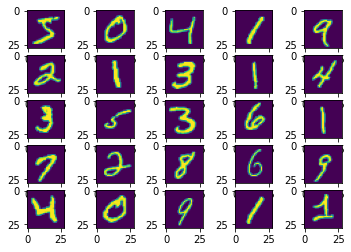

In [ ]:
# Other neural network code here:

# Load data
import sklearn
from sklearn.preprocessing import MinMaxScaler

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig,axs = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False)

for j in range(5):
  axs[0, j].imshow(x_train[j,:,:])
for j in range(5):
  axs[1, j].imshow(x_train[j+5,:,:])
for j in range(5):
  axs[2, j].imshow(x_train[j+10,:,:])
for j in range(5):
  axs[3, j].imshow(x_train[j+15,:,:])
for j in range(5):
  axs[4, j].imshow(x_train[j+20,:,:])

min_max_scaler = MinMaxScaler()
x_train = x_train.reshape((60000,784))
x_train = min_max_scaler.fit_transform(x_train)
x_test = x_test.reshape(10000,784)
x_test = min_max_scaler.transform(x_test)

In [ ]:
import tensorflow as tf

def neural_network(x_train, y_train, x_test, y_test):
  # Implement model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(10, activation = 'sigmoid', input_shape=(784,)))
  model.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))
  model.add(tf.keras.layers.Dense(10))
  # Feel free to change this up, but leave it at first
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  # Fit and evaluate
  model.fit(x_train, y_train, batch_size=32, epochs=1)
  # Calculate predictions
  test_loss, test_acc = model.evaluate(x_test, y_test)
  return test_loss, test_acc

neural_network(x_train,y_train,x_test,y_test)

313/313 [==============================] - 0s 958us/step - loss: 0.7961 - accuracy: 0.8319


(0.7960571050643921, 0.8319000005722046)

#Variation 1:

#Variation 2:

#Variation 3: 

In [ ]:
def neural_network2(x_train, y_train, x_test, y_test):
  # Implement model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(300, activation = 'sigmoid', input_shape=(784,)))
  model.add(tf.keras.layers.Dense(300, activation = 'sigmoid'))
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
  # Feel free to change this up, but leave it at first
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  # Fit and evaluate
  model.fit(x_train, y_train, batch_size=32, epochs=1)
  # Calculate predictions
  predictions = model.predict(x_test)
  test_loss, test_acc = model.evaluate(x_test, y_test)
  return test_loss, test_acc, predictions

current_network = neural_network2(x_train,y_train,x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1812 - accuracy: 0.9441


<Figure size 432x288 with 0 Axes>

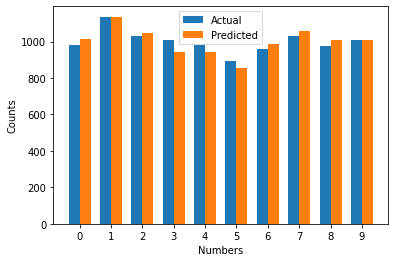

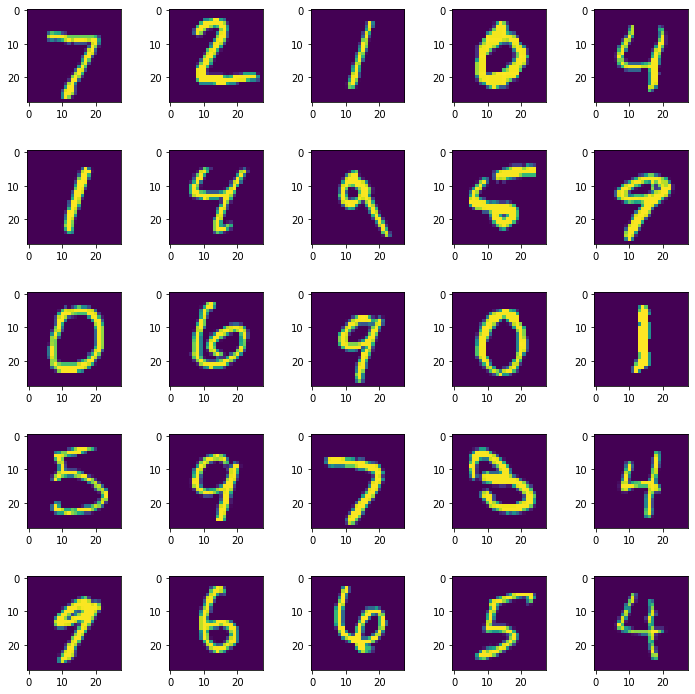

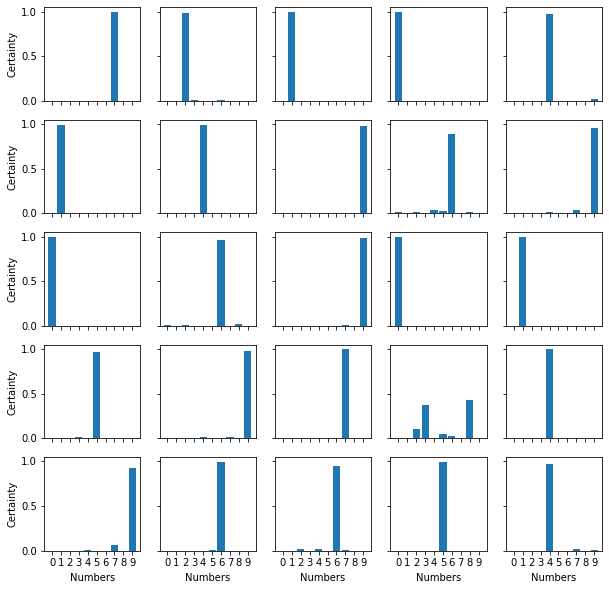

In [ ]:
from collections import Counter
fig = plt.figure()
nums = ['0','1','2','3','4','5','6','7','8','9']
actual = sorted(Counter((y_test)).items())
pred = sorted(Counter((np.argmax(current_network[2],axis=-1))).items())
dist = current_network[2]

actual = np.array(actual).reshape(10,2)[:,1]
pred = np.array(pred).reshape(10,2)[:,1]
x = np.arange(len(nums))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual, width, label='Actual')
rects2 = ax.bar(x + width/2, pred, width, label='Predicted')

ax.set_ylabel('Counts')
ax.set_xlabel('Numbers')
ax.set_xticks(x)
ax.set_xticklabels(nums)
ax.legend()

(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()
fig,axs = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False, figsize=(10, 10))
fig.tight_layout()
for j in range(5):
  axs[0, j].imshow(x_test1[j,:,:])
for j in range(5):
  axs[1, j].imshow(x_test1[j+5,:,:])
for j in range(5):
  axs[2, j].imshow(x_test1[j+10,:,:])
for j in range(5):
  axs[3, j].imshow(x_test1[j+15,:,:])
for j in range(5):
  axs[4, j].imshow(x_test1[j+20,:,:])

fig,axs = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
for j in range(5):
  axs[0, j].bar(x, dist[j,:])
  axs[0, 0].set_ylabel('Certainty')
  axs[0, j].set_xticks(x)
  axs[0, j].set_xticklabels(nums)
for j in range(5):
  axs[1, j].bar(x, dist[j+5,:])
  axs[1, 0].set_ylabel('Certainty')
  axs[1, j].set_xticks(x)
  axs[1, j].set_xticklabels(nums)
for j in range(5):
  axs[2, j].bar(x, dist[j+10,:])
  axs[2, 0].set_ylabel('Certainty')
  axs[2, j].set_xticks(x)
  axs[2, j].set_xticklabels(nums)
for j in range(5):
  axs[3, j].bar(x, dist[j+15,:])
  axs[3, 0].set_ylabel('Certainty')
  axs[3, j].set_xticks(x)
  axs[3, j].set_xticklabels(nums)
for j in range(5):
  axs[4, j].bar(x, dist[j+20,:])
  axs[4, 0].set_ylabel('Certainty')
  axs[4, j].set_xlabel('Numbers', labelpad = 5)
  axs[4, j].set_xticks(x)
  axs[4, j].set_xticklabels(nums)

## Random Forest

The `random_forest` function learns an ensemble of numBags CART decision trees using a random subset of the features at each split on the input dataset and also plots the  out-of-bag error as a function of the number of bags

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels
* `num_bags` is the number of trees to learn in the ensemble
* `m` is the number of randomly selected features to consider at each split

Outputs: 
* `out_of_bag_error` is the out-of-bag classification error of the final learned ensemble
* `test_error` is the classification error of the final learned ensemble on test data

Note: You may use sklearns 'DecisonTreeClassifier' but **not** 'RandomForestClassifier' or any other bagging function



In [ ]:
#a)
# data_train = pd.read_csv('/Users/DeanOken97/Desktop/FALL 2020/CSE 417T Introduction to Machine Learning/Homework 5/HW5_Data_Files/zip_train.csv').to_numpy()
# data_test = pd.read_csv('/Users/DeanOken97/Desktop/FALL 2020/CSE 417T Introduction to Machine Learning/Homework 5/HW5_Data_Files/zip_test.csv').to_numpy()

data_train = pd.read_csv('zip_train.csv').to_numpy()
data_test = pd.read_csv('zip_test.csv').to_numpy()


data_train1v3 = data_train[np.where(data_train[:,0] == 1),:][0]
data_train1v3 = np.vstack((data_train1v3,data_train[np.where(data_train[:,0] == 3),:][0]))

data_test1v3 = data_test[np.where(data_test[:,0] == 1),:][0]
data_test1v3 = np.vstack((data_test1v3,data_test[np.where(data_test[:,0] == 3),:][0]))

x_train1v3 = data_train1v3[:,1:data_train1v3.shape[1]]
y_train1v3 = data_train1v3[:,0]

x_test1v3 = data_test1v3[:,1:data_test1v3.shape[1]]
y_test1v3 = data_test1v3[:,0]


data_train3v5 = data_train[np.where(data_train[:,0] == 3),:][0]
data_train3v5 = np.vstack((data_train3v5,data_train[np.where(data_train[:,0] == 5),:][0]))

data_test3v5 = data_test[np.where(data_test[:,0] == 3),:][0]
data_test3v5 = np.vstack((data_test3v5,data_test[np.where(data_test[:,0] == 5),:][0]))

x_train3v5 = data_train3v5[:,1:data_train3v5.shape[1]]
y_train3v5 = data_train3v5[:,0]

x_test3v5 = data_test3v5[:,1:data_test3v5.shape[1]]
y_test3v5 = data_test3v5[:,0]

In [ ]:
def random_forest(X_train, y_train, X_test, y_test, num_bags, m):
    
    out_of_bag_collect = np.zeros(num_bags)
    tree = list()
    treePred = np.zeros((len(y_test),num_bags))
    
    for i in range(num_bags):
        cur_test = list()
        a = np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)
        sample = X_train[a]
        tree.append(DecisionTreeClassifier(max_features = m))
        tree[i].fit(sample,y_train[a])
        b = np.setdiff1d(np.arange(X_train.shape[0]),np.unique(a))
        counter1 = np.sum(tree[i].predict(X_train[b]) != y_train[b])
        out_of_bag_collect[i] = counter1/len(b)
        treePred[:,i] = tree[i].predict(X_test)
        
    out_of_bag_error = np.mean(out_of_bag_collect)   
    treePred = treePred.mean(axis=1)
    counter2 = np.sum(treePred != y_test)
    test_error = counter2/len(y_test)
                                              
    return out_of_bag_error, test_error

## Run and Plot

Run your random forest code and plot figures below

In [ ]:
#b) 
# Other random forest code here:
print(random_forest(x_train1v3, y_train1v3, x_test1v3, y_test1v3, 5, 16))
print(random_forest(x_train3v5, y_train3v5, x_test3v5, y_test3v5, 5, 16))

(0.007237410127567216, 0.07209302325581396)
(0.10489917011981129, 0.4171779141104294)


The first row is the 1v3 model. The second row is the 3v5 model. The first column is the out of bag error. The second column is the test error.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


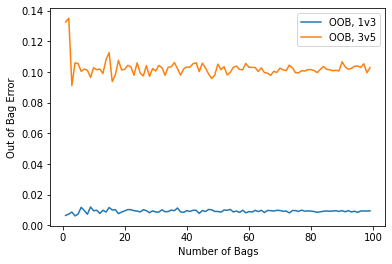

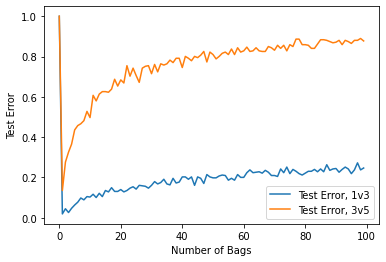

In [ ]:
#c)
numBag = np.arange(100)

oob1v3 = np.zeros(len(numBag))
oob3v5 = np.zeros(len(numBag))

test_error1v3 = np.zeros(len(numBag))
test_error3v5 = np.zeros(len(numBag))

for i in range(len(numBag)):
    OneV3 = random_forest(x_train1v3, y_train1v3, x_test1v3, y_test1v3, numBag[i], 16)
    ThreeV5 = random_forest(x_train3v5, y_train3v5, x_test3v5, y_test3v5, numBag[i], 16)
    
    oob1v3[i] = OneV3[0]
    oob3v5[i] = ThreeV5[0]

    test_error1v3[i] = OneV3[1]
    test_error3v5[i] = ThreeV5[1]

plt.plot(numBag,oob1v3)
plt.plot(numBag,oob3v5)
plt.xlabel('Number of Bags')
plt.ylabel('Out of Bag Error')
plt.legend(["OOB, 1v3", "OOB, 3v5"])
plt.figure()

plt.plot(numBag,test_error1v3)
plt.plot(numBag,test_error3v5)
plt.xlabel('Number of Bags')
plt.ylabel('Test Error')
plt.legend(["Test Error, 1v3", "Test Error, 3v5"])

The performance of the 1v3 model is significantly better than the performance of the 3v5 model, as indicated by the significantly higher test error across all number of bags. The 1v3 set was most likely a more difficult set compared to the 3v5 set. There is no remedy for this, given that we do not change our hypothesis set. The more bags we use, the greater our out of sample error for both sets. The optimal number of bags on testing data indicated that the less we used, the better.

As we increase the number of bags, the average out of bag error remains relatively constant for each of the 1v3 (at 1%) and 3v5 models (10%). This indicates a relatively consistent bias for each model, since we are, on average, hitting the same value. That being said, as number of bags is increased, the fluctuations of the out of bag error for each model decreased. This indicates a decreasing variance since we are more consistently hitting the same value within each trial.

Unfortunately, there is a tradeoff here. The more confident we are in our model's performance, the worse the actual performance was on unseen data.

5) For neural networks,
a. Backpropagation is an NP hard problem
b. There are only a handful of possible activation functions
c. Deep learning networks can have 1 hidden layer
d. With only 1 hidden layer, the model can't solve the XOR problem

Correct answer: (a)
